[View in Colaboratory](https://colab.research.google.com/github/Pratham777/pix2pix/blob/master/Face_key.ipynb)

In [1]:
!git clone https://github.com/jamesrequa/Facial-Keypoint-Detection.git

Cloning into 'Facial-Keypoint-Detection'...
remote: Counting objects: 74, done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 74 (delta 20), reused 74 (delta 20), pack-reused 0
Unpacking objects: 100% (74/74), done.


In [0]:
import os
os.chdir("Facial-Keypoint-Detection/")

In [0]:
os.mkdir("data")

In [6]:
from google.colab import files
uploaded = files.upload()

Saving training.zip to training.zip


In [7]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [8]:
!unzip training.zip

Archive:  training.zip
  inflating: training.csv            


In [9]:
!unzip test.zip

Archive:  test.zip
  inflating: test.csv                


In [0]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image
import time
import pandas as pd

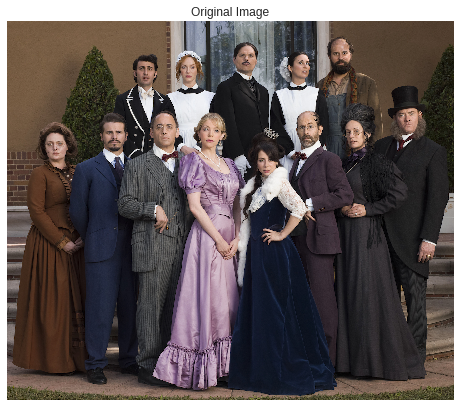

In [11]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 13


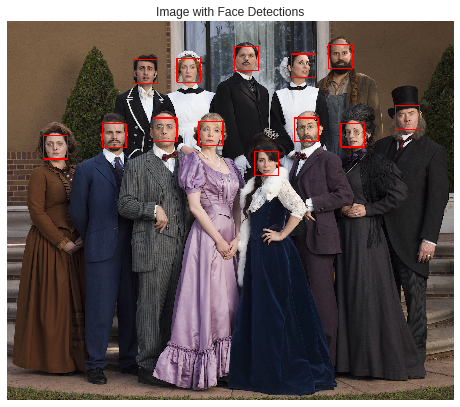

In [12]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

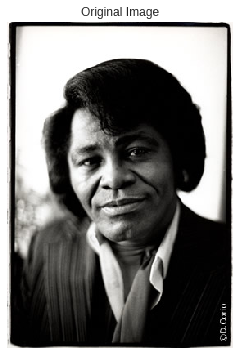

In [13]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 1


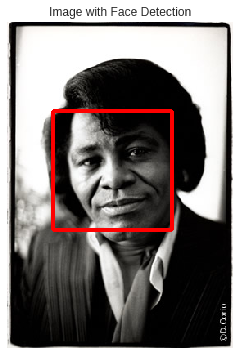

In [14]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

Number of faces detected: 1
Number of eyes detected: 2


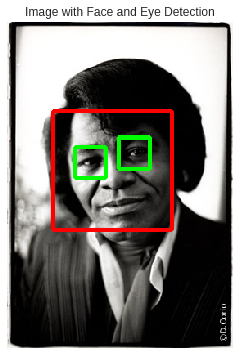

In [15]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Do not change the code above this comment!

    
## TODO: Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Extract the pre-trained eye detector from an xml file
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Detect the faces in image
eyes = eye_cascade.detectMultiScale(gray, 1.02, 3)

# Print the number of eyes detected in the image
print('Number of eyes detected:', len(eyes))

## TODO: Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
for (x,y,w,h) in eyes:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(0,255,0), 3)  

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

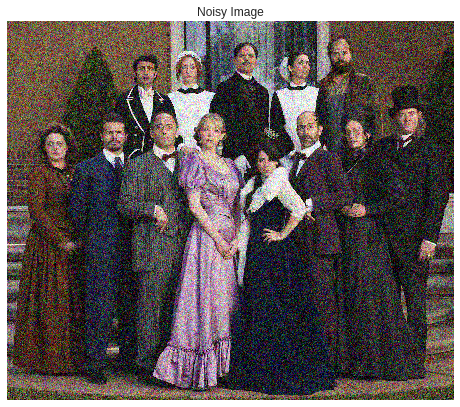

In [16]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

Number of faces detected: 11


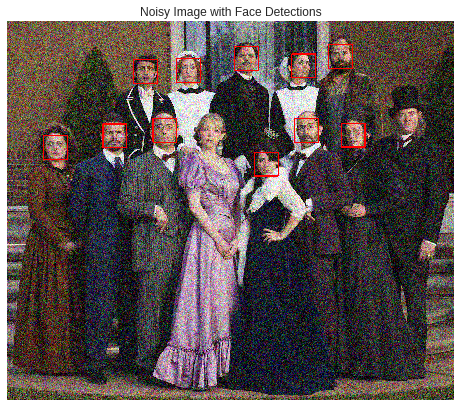

In [17]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

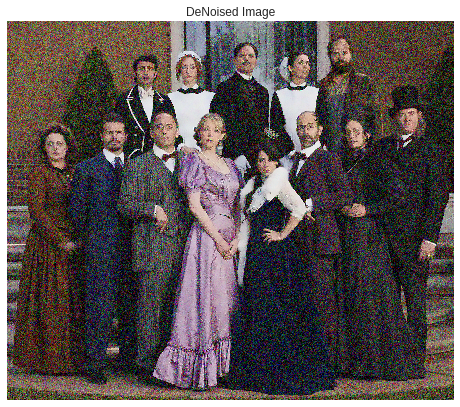

In [18]:
# Use OpenCV's built in color image de-noising function to clean up our noisy image!
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,10,10,7,21)

# Display the image with denoise applied
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image')
ax1.imshow(denoised_image)

Number of faces detected: 13


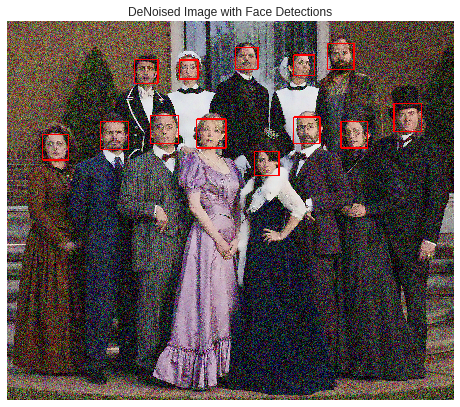

In [19]:
# Run the face detector on the de-noised image to improve detections and display the result

# Convert the RGB  image to grayscale
gray_noise_denoise = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Detect the faces in image
faces_denoise = face_cascade.detectMultiScale(gray_noise_denoise, 1.3, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces_denoise))

# Make a copy of the orginal image to draw face detections on
image_with_detections_denoise = np.copy(denoised_image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces_denoise:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections_denoise, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image with Face Detections')
ax1.imshow(image_with_detections_denoise)

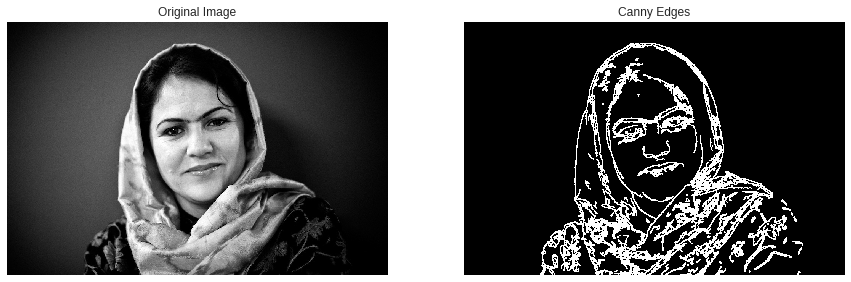

In [20]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

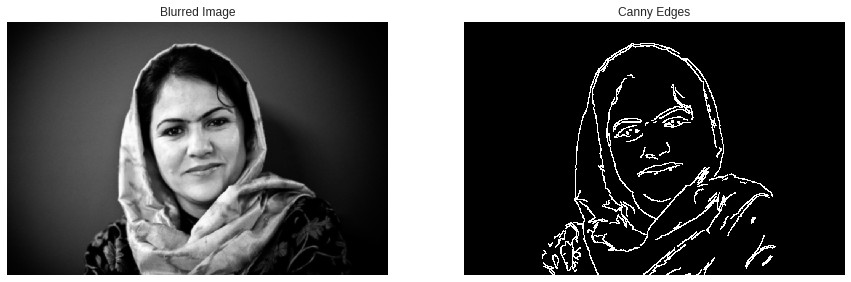

In [21]:
orig_img = np.copy(image)
kernel = np.ones((4,4),np.float32)/16
blur = cv2.filter2D(orig_img,-1,kernel)

# Perform Canny edge detection on blurred image
edges_blur = cv2.Canny(blur,100,200)

# Dilate the image to amplify edges
edges_blur = cv2.dilate(edges_blur, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blur)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges_blur, cmap='gray')

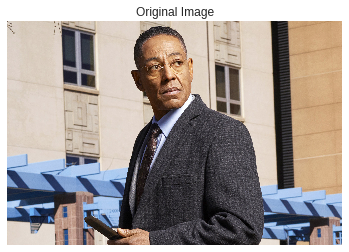

In [22]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 1


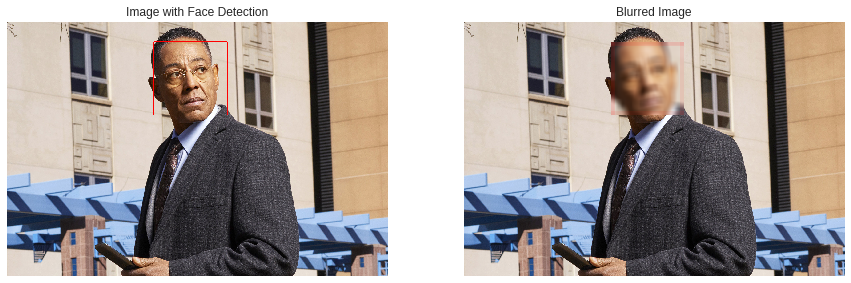

In [23]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 5)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    face_crop = image_with_detections[y:y+h, x:x+w]
    

# Display the image with the detections
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

## Blur the bounding box around each detected face using an averaging filter and display the result
result_image = np.copy(image)
kernel_2 = np.ones((40,40),np.float32)/1600
blur_2 = cv2.filter2D(face_crop,-1,kernel_2)
result_image[y:y+blur_2.shape[0], x:x+blur_2.shape[1]] = blur_2

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Blurred Image')
ax2.imshow(result_image)

In [0]:
os.chdir("..")

In [27]:
!ls

datalab  Facial-Keypoint-Detection


In [0]:
os.chdir("Facial-Keypoint-Detection/")

In [29]:
!ls

data				 images       test.csv	    training.zip
detector_architectures		 __pycache__  test.zip	    utils.py
Facial-Keypoint-Detection.ipynb  README.md    training.csv


In [0]:
!mv test.csv data


In [31]:
!ls

data				 images       test.zip	    utils.py
detector_architectures		 __pycache__  training.csv
Facial-Keypoint-Detection.ipynb  README.md    training.zip


In [0]:
!mv training.csv data


In [0]:
os.chdir("..")

In [36]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


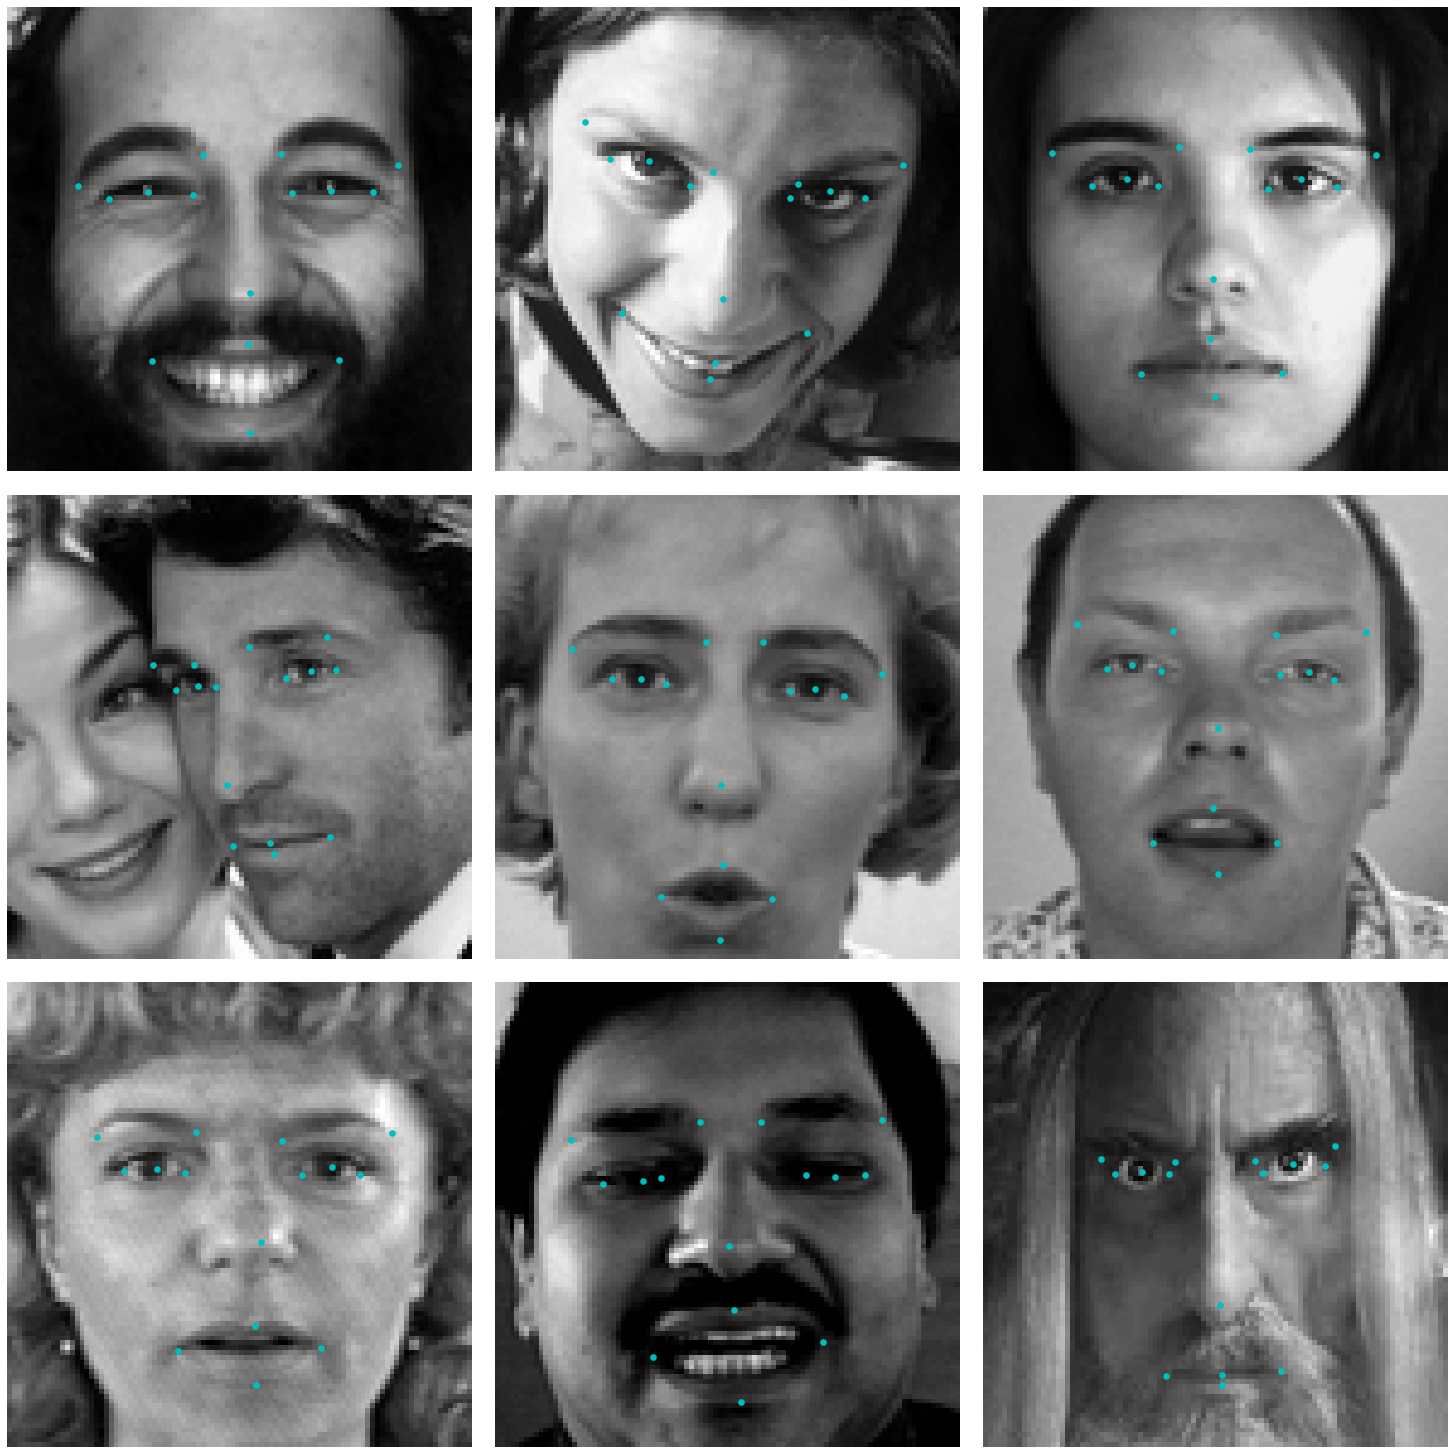

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

In [38]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))


# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [39]:
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

hist = History()
epochs = 50
batch_size = 64

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(X_train, y_train, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)


model.save('my_model_final.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0302 - acc: 0.4539 - val_loss: 0.0081 - val_acc: 0.6963

Epoch 00001: val_loss improved from inf to 0.00807, saving model to weights.final_2.hdf5
Epoch 2/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0089 - acc: 0.5537 - val_loss: 0.0048 - val_acc: 0.6963

Epoch 00002: val_loss improved from 0.00807 to 0.00478, saving model to weights.final_2.hdf5
Epoch 3/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0069 - acc: 0.6110 - val_loss: 0.0044 - val_acc: 0.6963

Epoch 00003: val_loss improved from 0.00478 to 0.00444, saving model to weights.final_2.hdf5
Epoch 4/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0063 - acc: 0.6349 - val_loss: 0.0044 - val_acc: 0.6963

Epoch 00004: val_loss improved from 0.00444 to 0.00440, saving model to weights.final_2.hdf5
Epoch 5/50
1712/1712 [===============

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0056 - acc: 0.6548 - val_loss: 0.0041 - val_acc: 0.6963

Epoch 00006: val_loss improved from 0.00440 to 0.00410, saving model to weights.final_2.hdf5
Epoch 7/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0051 - acc: 0.6525 - val_loss: 0.0039 - val_acc: 0.7033

Epoch 00007: val_loss improved from 0.00410 to 0.00386, saving model to weights.final_2.hdf5
Epoch 8/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0047 - acc: 0.6723 - val_loss: 0.0037 - val_acc: 0.7009

Epoch 00008: val_loss improved from 0.00386 to 0.00365, saving model to weights.final_2.hdf5
Epoch 9/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0044 - acc: 0.6723 - val_loss: 0.0031 - val_acc: 0.7056

Epoch 00009: val_loss improved from 0.00365 to 0.00312, saving model to weights.final_2.hdf5
Epoch 10/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0039 - acc

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0037 - acc: 0.6665 - val_loss: 0.0024 - val_acc: 0.6986

Epoch 00011: val_loss improved from 0.00291 to 0.00238, saving model to weights.final_2.hdf5
Epoch 12/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0033 - acc: 0.6928 - val_loss: 0.0022 - val_acc: 0.7009

Epoch 00012: val_loss improved from 0.00238 to 0.00225, saving model to weights.final_2.hdf5
Epoch 13/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0030 - acc: 0.6863 - val_loss: 0.0020 - val_acc: 0.7009

Epoch 00013: val_loss improved from 0.00225 to 0.00203, saving model to weights.final_2.hdf5
Epoch 14/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0028 - acc: 0.6968 - val_loss: 0.0019 - val_acc: 0.7126

Epoch 00014: val_loss improved from 0.00203 to 0.00187, saving model to weights.final_2.hdf5
Epoch 15/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0028 - 

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0024 - acc: 0.7044 - val_loss: 0.0019 - val_acc: 0.7266

Epoch 00016: val_loss improved from 0.00187 to 0.00186, saving model to weights.final_2.hdf5
Epoch 17/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0025 - acc: 0.6986 - val_loss: 0.0018 - val_acc: 0.7360

Epoch 00017: val_loss improved from 0.00186 to 0.00184, saving model to weights.final_2.hdf5
Epoch 18/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0023 - acc: 0.7220 - val_loss: 0.0016 - val_acc: 0.7313

Epoch 00018: val_loss improved from 0.00184 to 0.00157, saving model to weights.final_2.hdf5
Epoch 19/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0022 - acc: 0.7120 - val_loss: 0.0015 - val_acc: 0.7313

Epoch 00019: val_loss improved from 0.00157 to 0.00153, saving model to weights.final_2.hdf5
Epoch 20/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0021 - 

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0020 - acc: 0.7167 - val_loss: 0.0015 - val_acc: 0.7266

Epoch 00021: val_loss did not improve from 0.00148
Epoch 22/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0019 - acc: 0.7371 - val_loss: 0.0014 - val_acc: 0.7383

Epoch 00022: val_loss improved from 0.00148 to 0.00141, saving model to weights.final_2.hdf5
Epoch 23/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0019 - acc: 0.7307 - val_loss: 0.0014 - val_acc: 0.7383

Epoch 00023: val_loss improved from 0.00141 to 0.00136, saving model to weights.final_2.hdf5
Epoch 24/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0017 - acc: 0.7447 - val_loss: 0.0013 - val_acc: 0.7383

Epoch 00024: val_loss improved from 0.00136 to 0.00132, saving model to weights.final_2.hdf5
Epoch 25/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0017 - acc: 0.7418 - val_loss: 0.0013 - val_acc: 


Epoch 00026: val_loss improved from 0.00131 to 0.00129, saving model to weights.final_2.hdf5
Epoch 27/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0017 - acc: 0.7535 - val_loss: 0.0015 - val_acc: 0.7547

Epoch 00027: val_loss did not improve from 0.00129
Epoch 28/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0016 - acc: 0.7640 - val_loss: 0.0013 - val_acc: 0.7640

Epoch 00028: val_loss improved from 0.00129 to 0.00129, saving model to weights.final_2.hdf5
Epoch 29/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0016 - acc: 0.7553 - val_loss: 0.0012 - val_acc: 0.7547

Epoch 00029: val_loss improved from 0.00129 to 0.00124, saving model to weights.final_2.hdf5
Epoch 30/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0016 - acc: 0.7570 - val_loss: 0.0019 - val_acc: 0.7757

Epoch 00030: val_loss did not improve from 0.00124
Epoch 31/50
1712/1712 [==============================] - 17s 10ms/

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0014 - acc: 0.7687 - val_loss: 0.0012 - val_acc: 0.7757

Epoch 00032: val_loss improved from 0.00124 to 0.00121, saving model to weights.final_2.hdf5
Epoch 33/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0015 - acc: 0.7850 - val_loss: 0.0012 - val_acc: 0.7804

Epoch 00033: val_loss improved from 0.00121 to 0.00121, saving model to weights.final_2.hdf5
Epoch 34/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0014 - acc: 0.7798 - val_loss: 0.0012 - val_acc: 0.7687

Epoch 00034: val_loss improved from 0.00121 to 0.00120, saving model to weights.final_2.hdf5
Epoch 35/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0014 - acc: 0.7804 - val_loss: 0.0012 - val_acc: 0.7921

Epoch 00035: val_loss improved from 0.00120 to 0.00117, saving model to weights.final_2.hdf5
Epoch 36/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0013 - 

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0013 - acc: 0.7938 - val_loss: 0.0013 - val_acc: 0.7944

Epoch 00037: val_loss did not improve from 0.00117
Epoch 38/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0014 - acc: 0.7810 - val_loss: 0.0012 - val_acc: 0.7780

Epoch 00038: val_loss did not improve from 0.00117
Epoch 39/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0013 - acc: 0.7891 - val_loss: 0.0012 - val_acc: 0.7967

Epoch 00039: val_loss improved from 0.00117 to 0.00117, saving model to weights.final_2.hdf5
Epoch 40/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0013 - acc: 0.8049 - val_loss: 0.0012 - val_acc: 0.7921

Epoch 00040: val_loss did not improve from 0.00117
Epoch 41/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0012 - acc: 0.7792 - val_loss: 0.0011 - val_acc: 0.8061

Epoch 00041: val_loss improved from 0.00117 to 0.00112, saving model to weig

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0012 - acc: 0.8026 - val_loss: 0.0012 - val_acc: 0.7944

Epoch 00043: val_loss did not improve from 0.00112
Epoch 44/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0012 - acc: 0.8032 - val_loss: 0.0011 - val_acc: 0.7874

Epoch 00044: val_loss improved from 0.00112 to 0.00109, saving model to weights.final_2.hdf5
Epoch 45/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - acc: 0.7956 - val_loss: 0.0011 - val_acc: 0.7850

Epoch 00045: val_loss improved from 0.00109 to 0.00108, saving model to weights.final_2.hdf5
Epoch 46/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - acc: 0.8096 - val_loss: 0.0011 - val_acc: 0.8084

Epoch 00046: val_loss did not improve from 0.00108
Epoch 47/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0012 - acc: 0.7979 - val_loss: 0.0011 - val_acc: 0.7780

Epoch 00047: val_loss did not impr

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - acc: 0.8102 - val_loss: 0.0011 - val_acc: 0.8014

Epoch 00048: val_loss did not improve from 0.00108
Epoch 49/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - acc: 0.8201 - val_loss: 0.0011 - val_acc: 0.7921

Epoch 00049: val_loss did not improve from 0.00108
Epoch 50/50
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - acc: 0.8067 - val_loss: 0.0011 - val_acc: 0.7897

Epoch 00050: val_loss did not improve from 0.00108


In [0]:
model.load_weights('weights.final_2.hdf5')

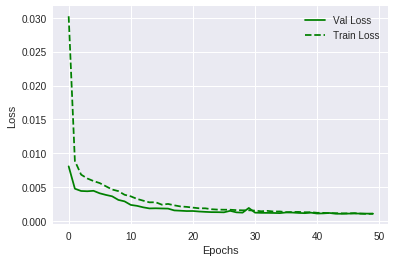

In [41]:
# Visualize the training and validation loss of the neural network
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

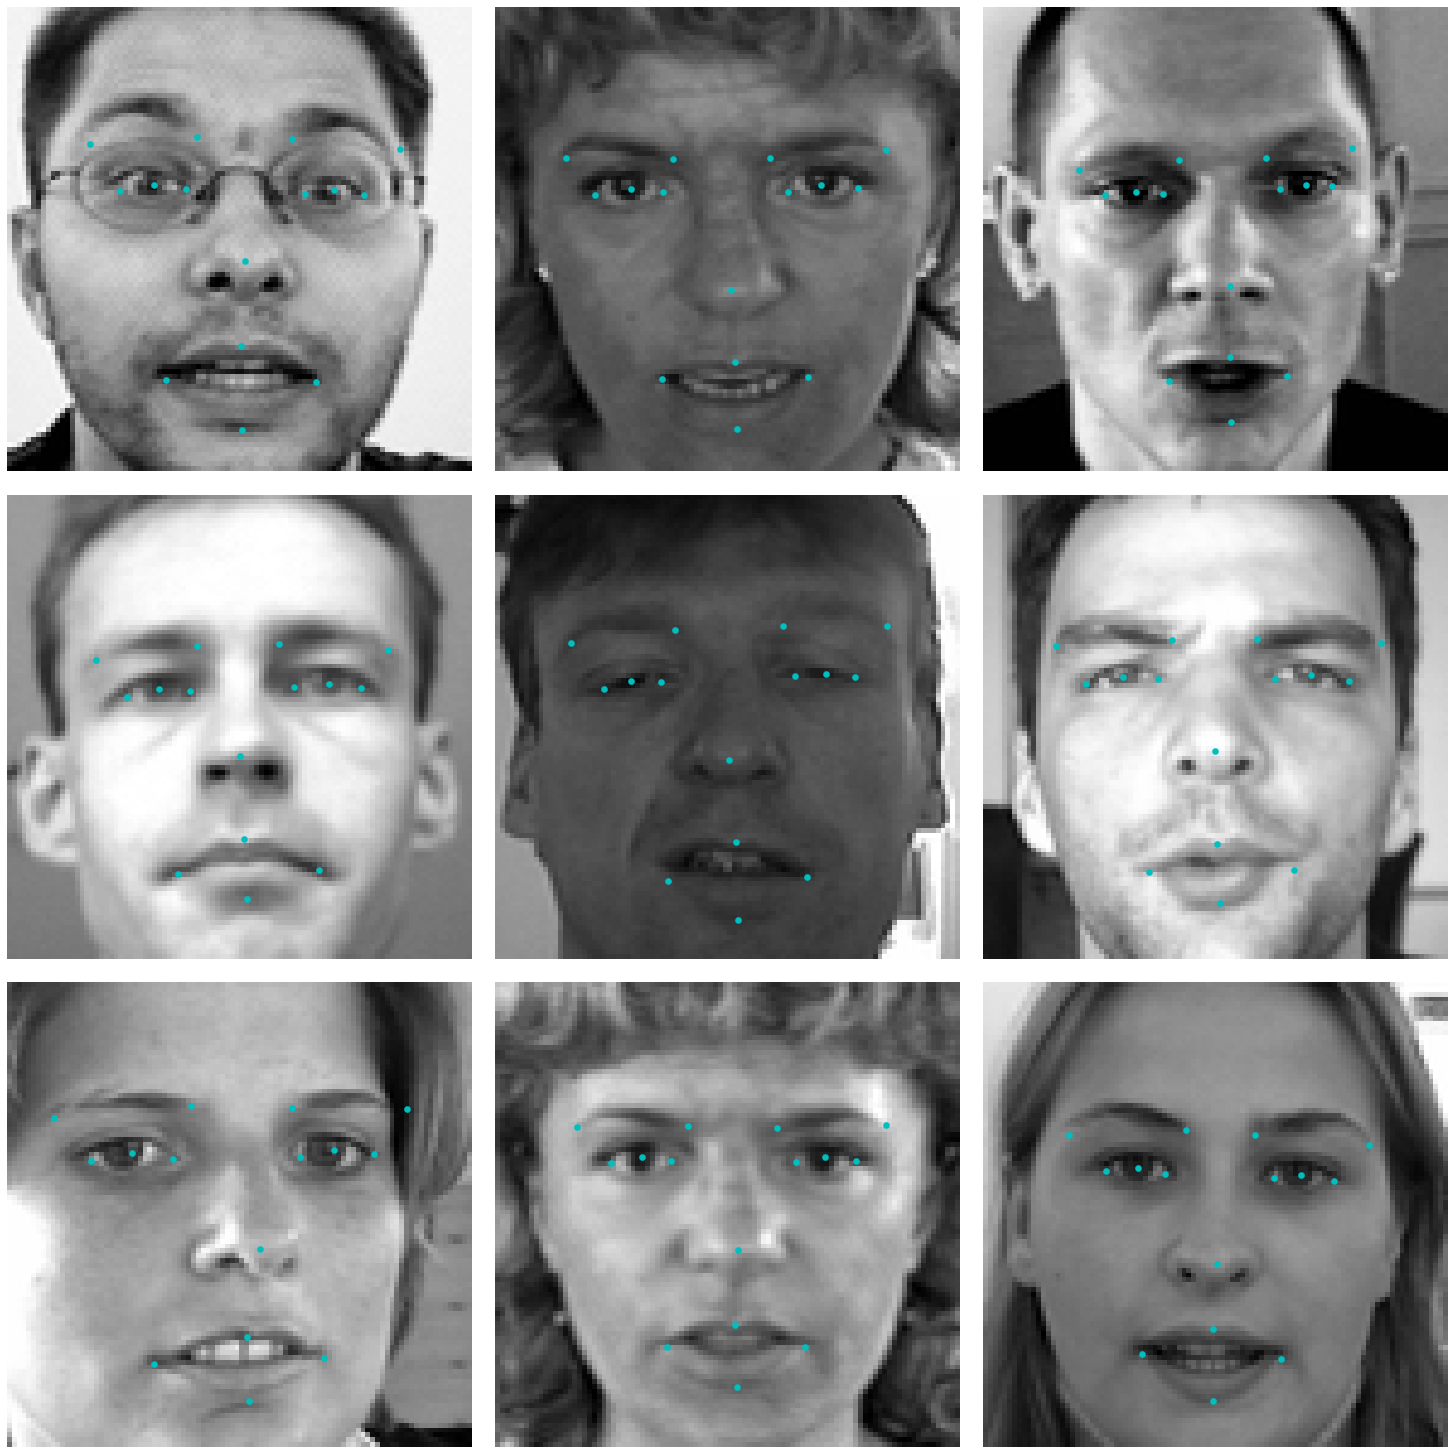

In [42]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

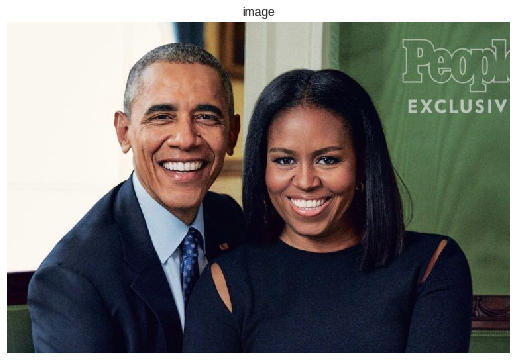

In [43]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')
ax1.imshow(image)

In [0]:
# Use the face detection code with our trained conv-net
def plot_keypoints(img_path, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scale, neighbors)
    fig = plt.figure(figsize=(40, 40))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)

    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        bgr_crop = image_with_detections[y:y+h, x:x+w] 
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
        
    ax.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

Number of faces detected: 2


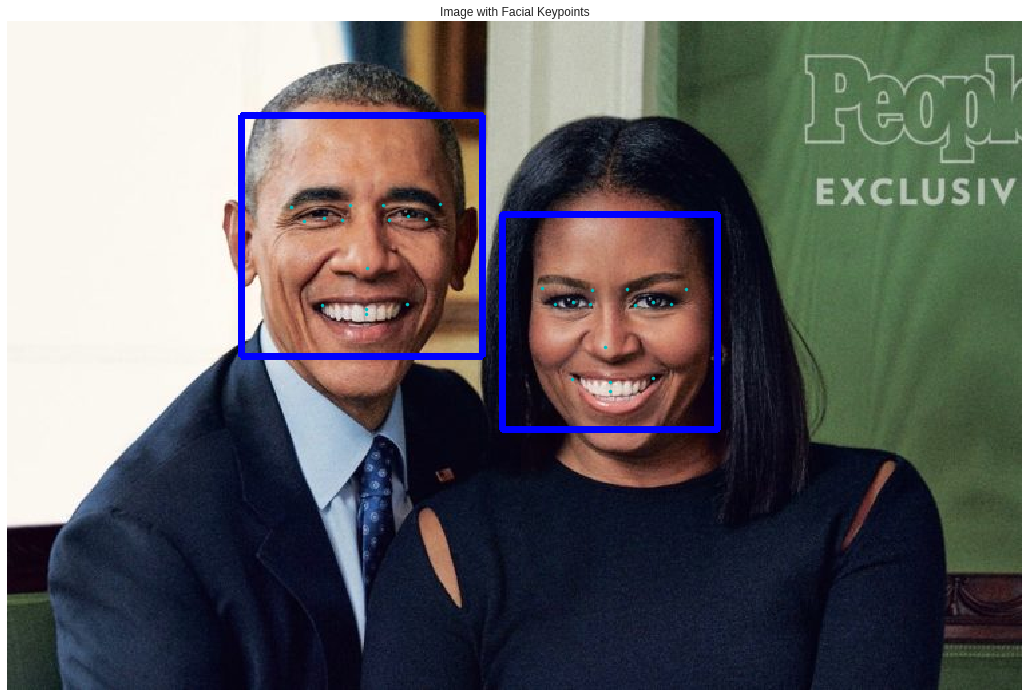

In [45]:
obamas = plot_keypoints('images/obamas4.jpg',
                        'detector_architectures/haarcascade_frontalface_default.xml',
                        'my_model_final.h5')

In [46]:
!ls

data				 my_model_final.h5  training.zip
detector_architectures		 __pycache__	    utils.py
Facial-Keypoint-Detection.ipynb  README.md	    weights.final_2.hdf5
images				 test.zip


In [0]:
os.chdir("images")

In [52]:
from google.colab import files
uploaded = files.upload()

Saving c1.jpg to c1.jpg


In [0]:
os.chdir("..")

Number of faces detected: 1


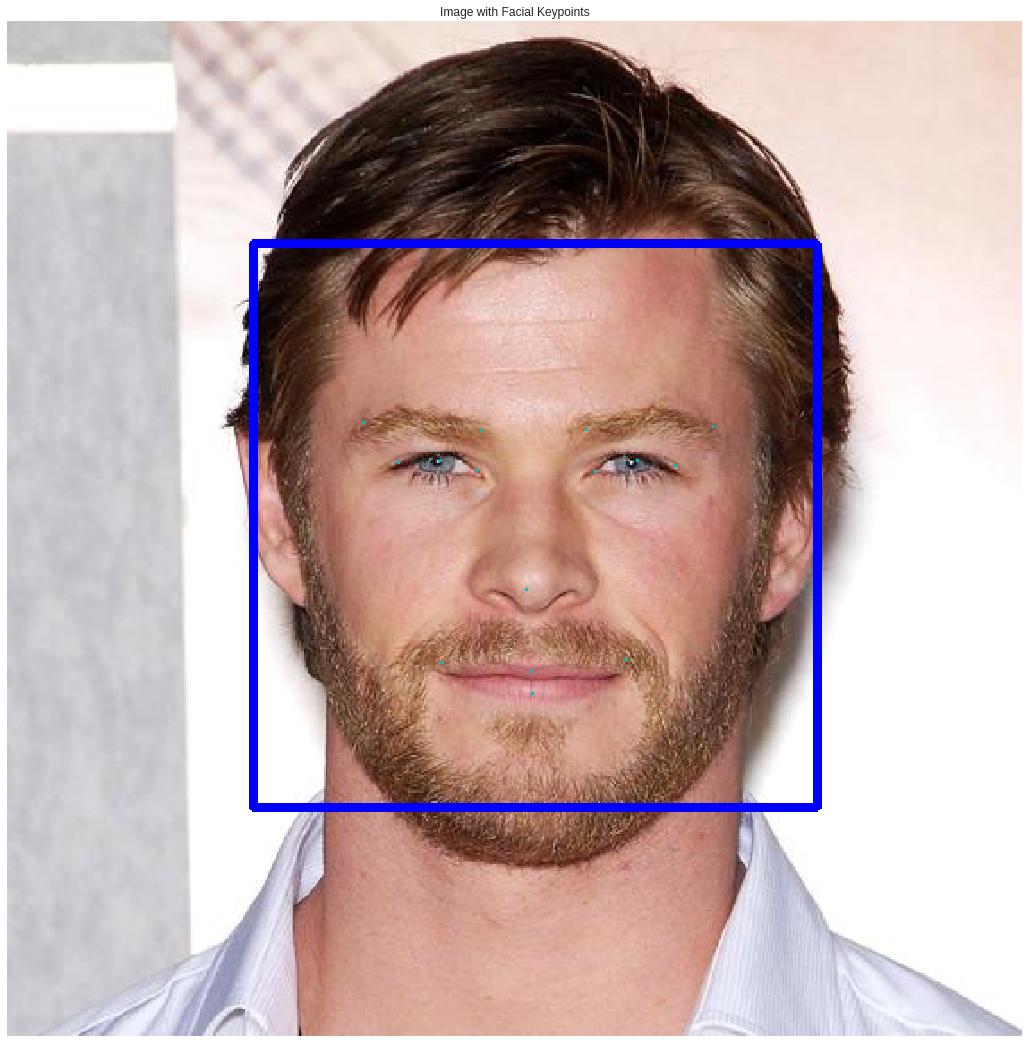

In [54]:
c = plot_keypoints('images/c1.jpg',
                        'detector_architectures/haarcascade_frontalface_default.xml',
                        'my_model_final.h5')